In [5]:
import pandas as pd
import numpy as np

Read the data into six separate dataframes.

In [6]:
df1 = pd.read_csv("turnstile_200606.csv")
df2 = pd.read_csv("turnstile_200530.csv")
df3 = pd.read_csv("turnstile_200411.csv")
df4 = pd.read_csv("turnstile_200321.csv")
df5 = pd.read_csv("turnstile_200208.csv")
df6 = pd.read_csv("turnstile_200118.csv")

Concatenate the data into one dataframe.

In [7]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [8]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


The DATE and TIME columns are object datatypes, which in Pandas is a string.

In [9]:
print('DATE datatype: {}, TIME datatype: "{}"'.format(df['DATE'].dtypes, df['TIME'].dtypes))

DATE datatype: object, TIME datatype: "object"


In [10]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

After conversion, the datatype for the DATETIME column is a datetime.

In [11]:
df['DATETIME'].dtypes

dtype('<M8[ns]')

In [12]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


The total entries for each turnstile are observed using the `groupby` function in Pandas.

In [13]:
df.groupby(['C/A', 'UNIT', 'SCP', 'STATION']).sum()

ENTRIES  \
C/A   UNIT SCP      STATION                     
A002  R051 02-00-00 59 ST          1856312674   
           02-00-01 59 ST          1656360047   
           02-03-00 59 ST           344531036   
           02-03-01 59 ST           360029390   
           02-03-02 59 ST          1643674329   
...                                       ...   
TRAM2 R469 00-00-01 RIT-ROOSEVELT   868760892   
           00-03-00 RIT-ROOSEVELT   188318641   
           00-03-01 RIT-ROOSEVELT   788266243   
           00-05-00 RIT-ROOSEVELT      774684   
           00-05-01 RIT-ROOSEVELT     1399608   

                                   EXITS                                                                 
C/A   UNIT SCP      STATION                                                                              
A002  R051 02-00-00 59 ST                                                  630021138                     
           02-00-01 59 ST                                                  372796746                     
           02-03-00 59 ST                                                 1297828534                     
           02-03-01 59 ST                                                  556973462                     
           02-03-02 59 ST                                                 2194517735                     
...                                                                              ...                     
TRAM2 R469 00-00-01 RIT-ROOSEVELT                                           10683165                     
           00-03-00 RIT-ROOSEVELT                                            7505729                     
           00-03-01 RIT-ROOSEVELT                                           99865512                     
           00-05-00 RIT-ROOSEVELT                                              15624                     
           00-05-01 RIT-ROOSEVELT                                             121352                     

[4974 rows x 2 columns]

In [15]:
df.groupby(['DATE']).sum()

,ENTRIES,EXITS
DATE,,
01/11/2020,1239367381882,1005654719915
01/12/2020,1241475825843,1006777544277
01/13/2020,1252572944425,1012682957082
01/14/2020,1248879513379,1013698288115
01/15/2020,1236358721964,1002633424552
01/16/2020,1249702198185,1011565994956
01/17/2020,1247278048698,1013213644458
02/01/2020,1241459246059,1012149087819
02/02/2020,1244905227437,1019681965895


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

Select one turnstile (combination of [C/A, UNIT, SCP, STATION])

In [50]:
one_ts = df.loc[(df['C/A'] == 'TRAM2') & (df['UNIT'] == 'R469') & (df['SCP'] == '00-00-00') & (df['STATION'] == 'RIT-ROOSEVELT')]
one_ts.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
207640,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,01:00:00,REGULAR,586736,11682,2020-05-30 01:00:00
207641,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,05:00:00,REGULAR,586736,11682,2020-05-30 05:00:00
207642,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,09:00:00,REGULAR,586775,11682,2020-05-30 09:00:00
207643,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,13:00:00,REGULAR,586868,11685,2020-05-30 13:00:00
207644,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,17:00:00,REGULAR,587032,11686,2020-05-30 17:00:00


Plot the turnstile.

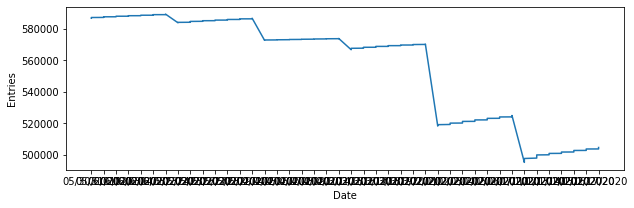

In [69]:
plt.figure(figsize=(10,3))

plt.plot(one_ts['DATE'], one_ts['ENTRIES'])
plt.xlabel('Date')
plt.ylabel('Entries')

#plt.locator_params(axis='y', nbins=6)
#plt.locator_params(axis='x', nbins=7)

plt.show()

Combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. 

In [71]:
df.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum()

ENTRIES  \
C/A   UNIT STATION       DATE                    
A002  R051 59 ST         01/11/2020  345377609   
                         01/12/2020  345429236   
                         01/13/2020  345484015   
                         01/14/2020  345560306   
                         01/15/2020  345635585   
...                                        ...   
TRAM2 R469 RIT-ROOSEVELT 06/01/2020   47781289   
                         06/02/2020   47785898   
                         06/03/2020   47790047   
                         06/04/2020   47794281   
                         06/05/2020   47798806   

                                     EXITS                                                                 
C/A   UNIT STATION       DATE                                                                              
A002  R051 59 ST         01/11/2020                                          193946103                     
                         01/12/2020                                          193983788                     
                         01/13/2020                                          194026938                     
                         01/14/2020                                          194078145                     
                         01/15/2020                                          194128895                     
...                                                                                ...                     
TRAM2 R469 RIT-ROOSEVELT 06/01/2020                                            2901383                     
                         06/02/2020                                            2901773                     
                         06/03/2020                                            2902103                     
                         06/04/2020                                            2902479                     
                         06/05/2020                                            2902860                     

[31341 rows x 2 columns]

In [75]:
df.groupby(['STATION', 'DATE']).sum()

ENTRIES  \
STATION   DATE                     
1 AV      01/11/2020  2739563565   
          01/12/2020  2739607633   
          01/13/2020  2739671835   
          01/14/2020  2739773213   
          01/15/2020  2739879046   
...                          ...   
ZEREGA AV 06/01/2020    15254563   
          06/02/2020    15257584   
          06/03/2020    15260474   
          06/04/2020    15263138   
          06/05/2020    15265964   

                      EXITS                                                                 
STATION   DATE                                                                              
1 AV      01/11/2020                                         2672779290                     
          01/12/2020                                         2672828226                     
          01/13/2020                                         2672904192                     
          01/14/2020                                         2673020966                     
          01/15/2020                                         2673143378                     
...                                                                 ...                     
ZEREGA AV 06/01/2020                                            9348681                     
          06/02/2020                                            9352376                     
          06/03/2020                                            9355796                     
          06/04/2020                                            9359265                     
          06/05/2020                                            9362876                     

[15885 rows x 2 columns]